In [16]:
from loreal_poc.dataloaders.loaders import DataLoader300W
from loreal_poc.dataloaders.wrappers import CroppedDataLoader, CachedDataLoader
from loreal_poc.marks.facial_parts import FacialParts
from loreal_poc.visualisation.draw import draw_marks

In [45]:
ds = DataLoader300W(dir_path="300W/sample", batch_size=16, shuffle=True)

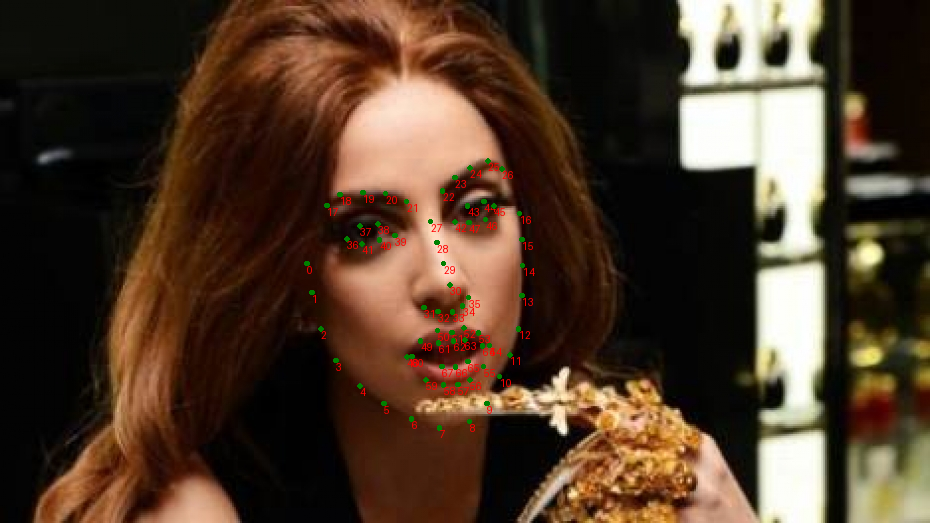

In [46]:
image, marks, meta = ds[0]
draw_marks(image, [marks], ["green"], [True])

In [35]:
images, marks, meta = next(iter(ds))
marks.shape

(16, 68, 2)

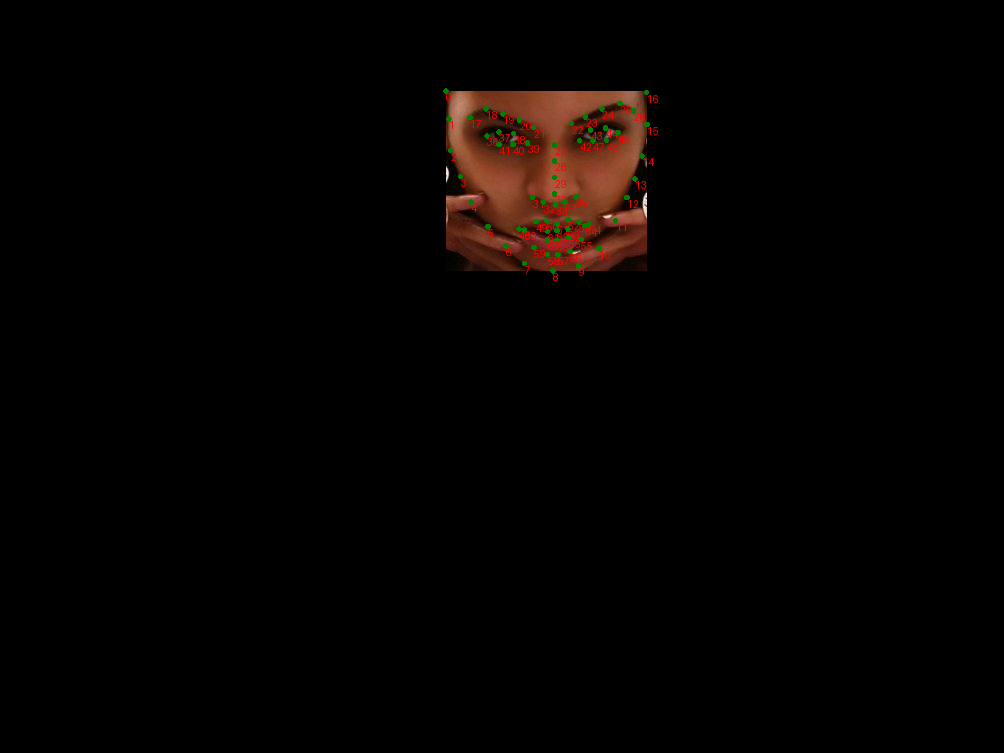

In [21]:
cropped_ds = CroppedDataLoader(ds, FacialParts.entire)
image, marks, meta = cropped_ds[0]
draw_marks(image, [marks], ["green"], [True])

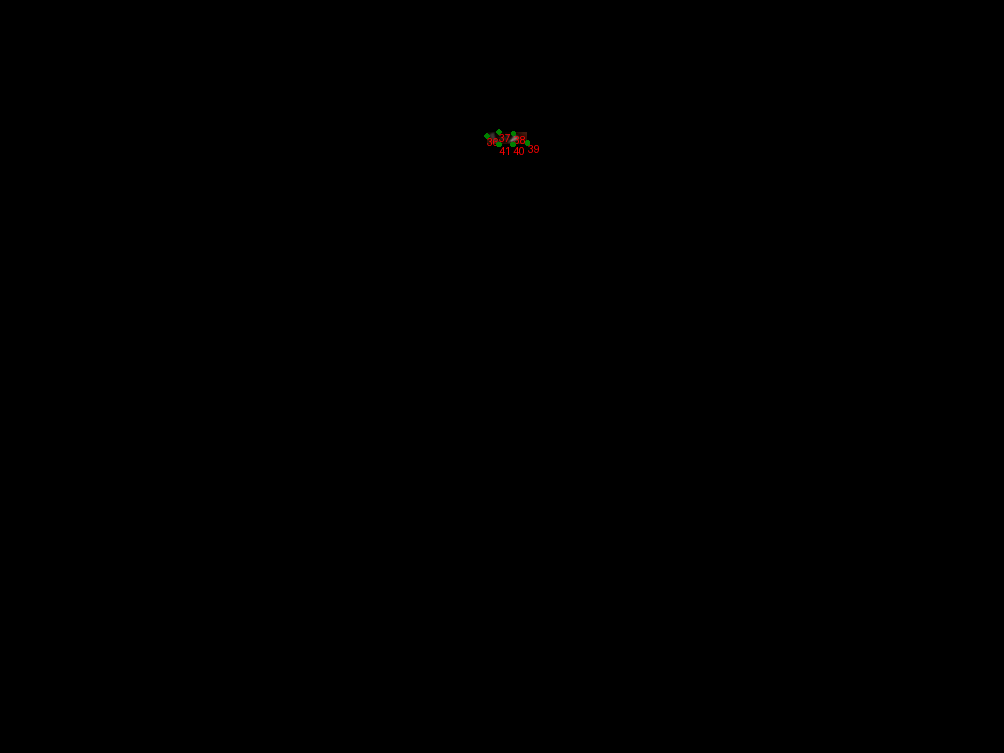

In [22]:
cropped_ds = CroppedDataLoader(ds, FacialParts.left_eye)
image, marks, meta = cropped_ds[0]
draw_marks(image, [marks], ["green"], [True])

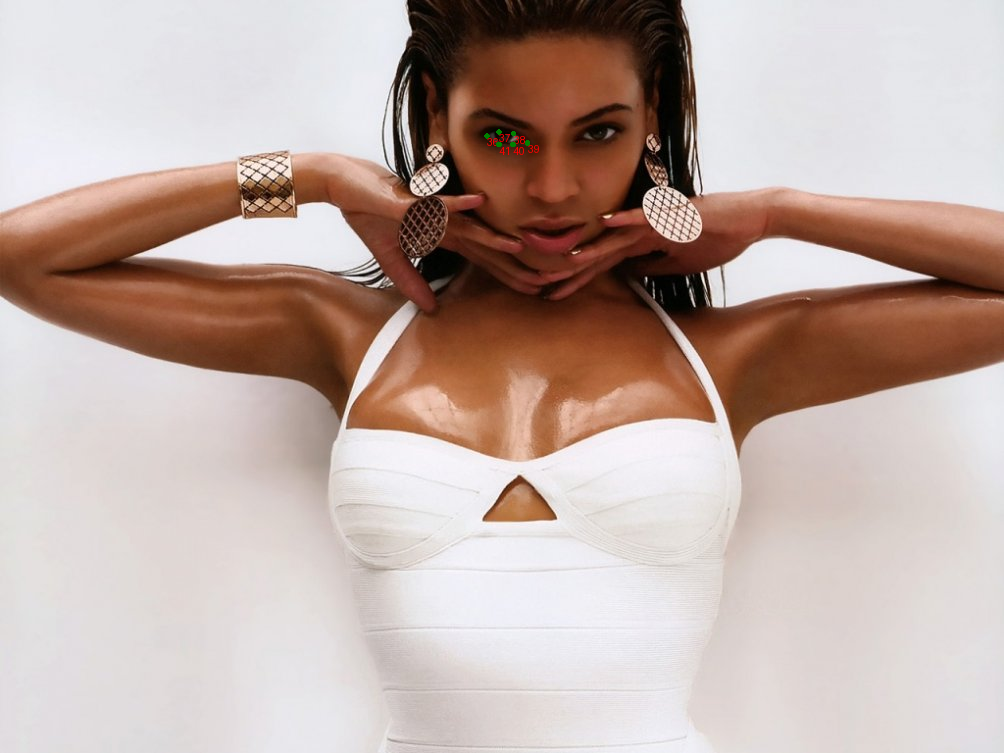

In [23]:
cropped_ds = CroppedDataLoader(ds, FacialParts.left_eye, crop_img=False)
image, marks, meta = cropped_ds[0]
draw_marks(image, [marks], ["green"], [True])

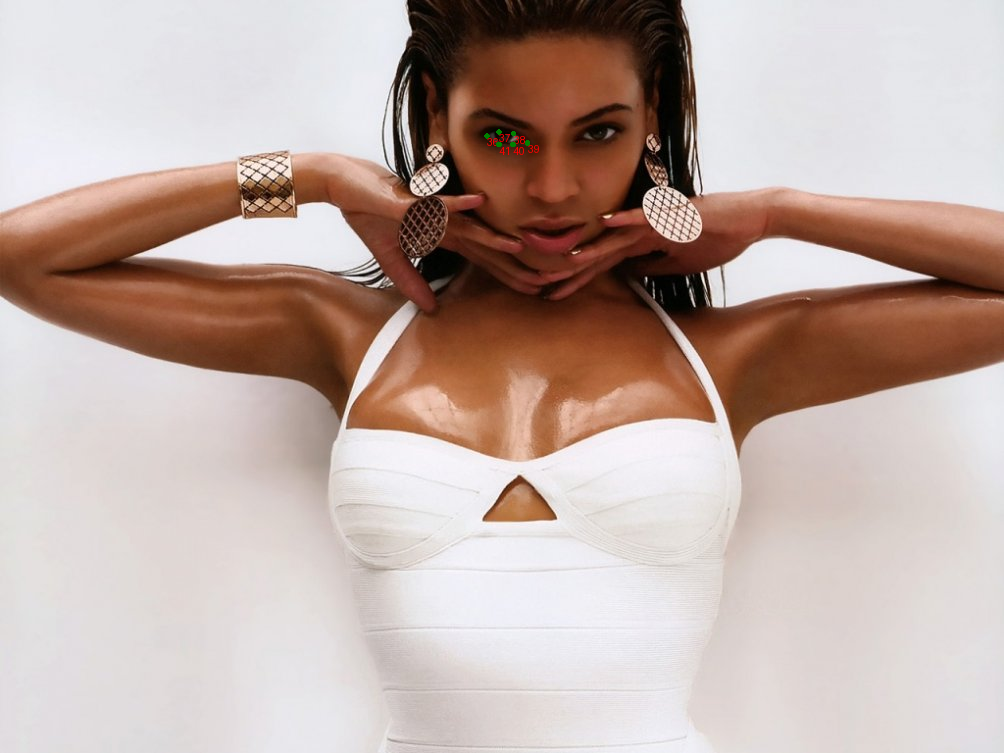

In [24]:
cropped_ds = CroppedDataLoader(ds, FacialParts.left_eye, crop_img=False)
image, marks, meta = cropped_ds[0]
draw_marks(image, [marks], ["green"], [True])

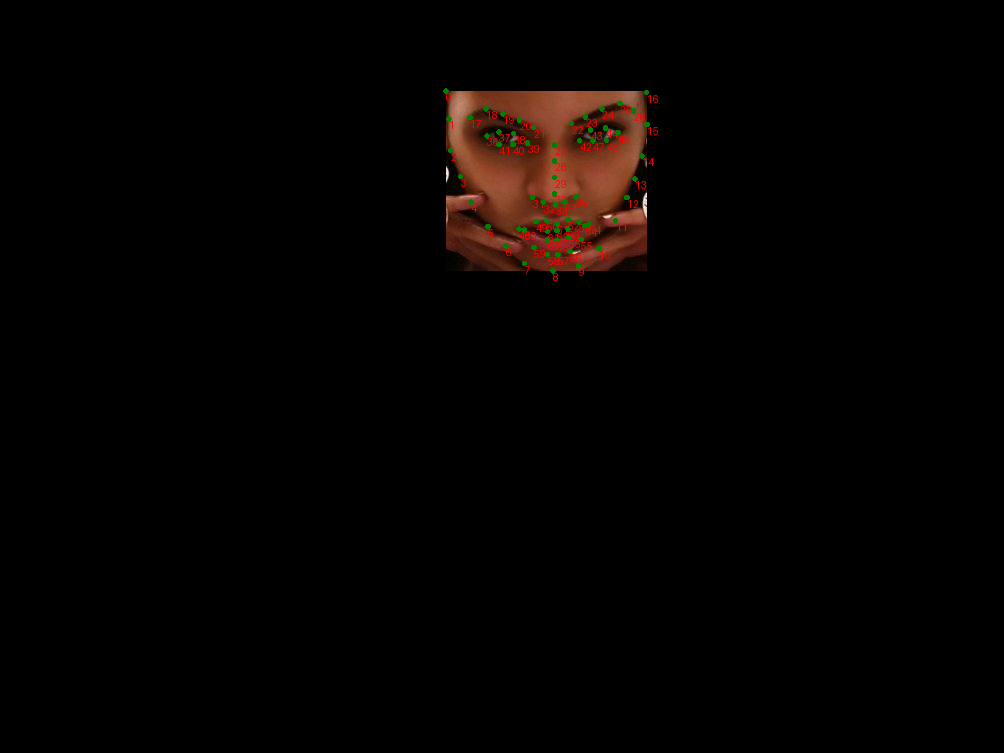

In [25]:
cropped_ds = CroppedDataLoader(ds, FacialParts.left_eye, crop_marks=False)
image, marks, meta = cropped_ds[0]
draw_marks(image, [marks], ["green"], [True])

In [26]:
%%timeit
dataset = CroppedDataLoader(ds, FacialParts.left_eye)
[elt for elt in dataset]

61.4 ms ± 886 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%%timeit
dataset = CroppedDataLoader(ds, FacialParts.left_eye)
[elt for elt in dataset]
[elt for elt in dataset]
[elt for elt in dataset]
[elt for elt in dataset]

242 ms ± 4.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%%timeit
dataset = CachedDataLoader(CroppedDataLoader(ds, FacialParts.left_eye))
[elt for elt in dataset]
[elt for elt in dataset]
[elt for elt in dataset]
[elt for elt in dataset]

61 ms ± 383 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
